In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

pd.options.display.max_rows = 10

Прочитане и преглед на данните:

In [2]:
original = pd.read_csv('data/titanic/train.csv')#, encoding='latin_1', low_memory=False)
test_to_submit  = pd.read_csv('data/titanic/test.csv') #, encoding='latin_1', low_memory=False)

In [3]:
test_to_submit.shape

(418, 11)

In [4]:
original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
original.shape

(891, 12)

In [6]:
data = original.copy()
data['Age'] = data.Age.fillna(data.Age.mean())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Повтарение на техниките от лекцията за да има стартов модел който да се подобрява.

In [7]:
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

In [8]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [9]:
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

In [10]:
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')
print(data.Title.value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64


In [11]:
age_by_title = data.groupby('Title').Age.mean()
data.loc[data.Age.isnull() & (data.Title == 'Mr'), 'Age'] = age_by_title['Mr']
data.loc[data.Age.isnull() & (data.Title == 'Mrs'), 'Age'] = age_by_title['Mrs']
data.loc[data.Age.isnull() & (data.Title == 'Miss'), 'Age'] = age_by_title['Miss']
data.loc[data.Age.isnull() & (data.Title == 'Master'), 'Age'] = age_by_title['Master']
data.loc[data.Age.isnull() & (data.Title == 'Rare'), 'Age'] = age_by_title['Rare']

In [12]:
data = data.drop(['Parch', 'SibSp', 'Cabin'], axis=1)

In [13]:
data['IsMale']    = (data.Sex == 'male').astype(float)
data['IsFemale']  = (data.Sex == 'female').astype(float)
data['IsMr']      = (data.Title == 'Mr').astype(float)
data['IsMrs']     = (data.Title == 'Mrs').astype(float)
data['IsMiss']    = (data.Title == 'Miss').astype(float)
data['IsMaster']  = (data.Title == 'Master').astype(float)
data['IsRare']    = (data.Title == 'Rare').astype(float)
data['EmbarkedC'] = (data.Embarked == 'C').astype(float)
data['EmbarkedQ'] = (data.Embarked == 'Q').astype(float)
data['EmbarkedS'] = (data.Embarked == 'S').astype(float)

data = data.drop(['Sex', 'Embarked', 'Title'], axis=1)
data = data.drop(['Name', 'Ticket', 'Fare'], axis=1)
data

,PassengerId,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
0,1,0,3,22.000000,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,38.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,26.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,35.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1,1,19.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,29.699118,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,890,1,1,26.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Данните са готови; разделяне на данние и трениране на модел:

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.841317365269
test score:  0.811659192825


In [16]:
for c in [0.001, 0.003, 0.006, 0.1, 0.3, 0.6, 1.0, 3.0, 6.0]:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    
    print("C={:f} train: {:f} test: {:f}".format(c, model.score(X_train, y_train), model.score(X_test, y_test)))

C=0.001000 train: 0.615269 test: 0.614350
C=0.003000 train: 0.724551 test: 0.713004
C=0.006000 train: 0.784431 test: 0.780269
C=0.100000 train: 0.812874 test: 0.807175
C=0.300000 train: 0.835329 test: 0.807175
C=0.600000 train: 0.838323 test: 0.811659
C=1.000000 train: 0.841317 test: 0.811659
C=3.000000 train: 0.839820 test: 0.811659
C=6.000000 train: 0.839820 test: 0.811659


Това (<span style="color:blue">0.811659</span>) **не** е най-добрия резултат от лекцията - тренираме другите модели:

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.976047904192
test score:  0.80269058296


Данните съответстват на тези от лекцията за RandomForestClassifier модела, но grid-а за търсене е леко разширен:

In [18]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100, 120],
                              'max_depth': [2, 3, 4, 5, 6, 8, 10, 15]},
                      cv=5, return_train_score=True)
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
17,1,0.828283,"{'max_depth': 4, 'n_estimators': 120}"
23,2,0.827160,"{'max_depth': 5, 'n_estimators': 120}"
14,3,0.826038,"{'max_depth': 4, 'n_estimators': 50}"
22,3,0.826038,"{'max_depth': 5, 'n_estimators': 100}"
16,5,0.824916,"{'max_depth': 4, 'n_estimators': 100}"
13,6,0.823793,"{'max_depth': 4, 'n_estimators': 30}"
29,7,0.822671,"{'max_depth': 6, 'n_estimators': 120}"
28,7,0.822671,"{'max_depth': 6, 'n_estimators': 100}"
15,7,0.822671,"{'max_depth': 4, 'n_estimators': 70}"
31,10,0.821549,"{'max_depth': 8, 'n_estimators': 30}"


In [19]:
model = RandomForestClassifier(random_state=0, n_estimators=120, max_depth=4).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.820627802691


Поред резултатите от grid-а за `n_estimators=120, max_depth=4` има най-добър резултат за mean_test_score при кръстосано валидиране. Метода score на RandomForestClassifier явно не ползва кръстосано валидиране и за разделението което сме направили има дава резултат под стредния.

In [20]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=0)
scores = []
for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    model = RandomForestClassifier(random_state=0, n_estimators=120, max_depth=4).fit(X_train, y_train)
    print('split', len(scores)+1, ':')
    print("  train score:", model.score(X_train, y_train))
    scores.append(model.score(X_test, y_test))
    print("  test score: ", scores[-1])

split 1 :
  train score: 0.837078651685
  test score:  0.843575418994
split 2 :
  train score: 0.841292134831
  test score:  0.826815642458
split 3 :
  train score: 0.837307152875
  test score:  0.825842696629
split 4 :
  train score: 0.841514726508
  test score:  0.792134831461
split 5 :
  train score: 0.826330532213
  test score:  0.853107344633


Колко е средно?

In [21]:
print('Mean test score:', np.mean(scores))

Mean test score: 0.828295186835


Всъщност най-добрия резултат от демото е в `Out[92]:`

0.835017	{'max_depth': 4, 'n_estimators': 70}

това е резултат от модел с намален брой характеристики (feature-и) и е сметнат с кръстосано валидиране с разделяне на данните на 3 сегмента.

Репродукция:

In [22]:
# data.loc[:, ['Survived', 'Pclass', 'Age', 'Embarked', 'Title', 'FamilySize', 'Male']]
less_data = data.loc[:, ['Survived', 'Pclass', 'Age', 'FamilySize']]
less_data

,Survived,Pclass,Age,FamilySize
0,0,3,22.000000,2
1,1,1,38.000000,2
2,1,3,26.000000,1
3,1,1,35.000000,2
4,0,3,35.000000,1
...,...,...,...,...
886,0,2,27.000000,1
887,1,1,19.000000,1
888,0,3,29.699118,4
889,1,1,26.000000,1


Няма запазен `DataFrame` с полу обработени данни, така че на ново.

In [23]:
less_data['Male'] = (original.Sex == 'male').astype(float)
less_data['Embarked'] = original.Embarked.fillna('S').apply(lambda x: ['C', 'S', 'Q'].index(x))
less_data['Title'] = original.Name.str.extract('([A-Za-z]+)\.', expand=False)
less_data.loc[less_data.Title == 'Mlle', 'Title'] = 'Miss'
less_data.loc[less_data.Title == 'Mme', 'Title']  = 'Mrs'
less_data.loc[less_data.Title == 'Ms', 'Title']   = 'Miss'
less_data.Title = less_data.Title.replace(rare_titles, 'Rare')
less_data.loc[less_data.Age.isnull() & (less_data.Title == 'Mr'), 'Age'] = age_by_title['Mr']
less_data.loc[less_data.Age.isnull() & (less_data.Title == 'Mrs'), 'Age'] = age_by_title['Mrs']
less_data.loc[less_data.Age.isnull() & (less_data.Title == 'Miss'), 'Age'] = age_by_title['Miss']
less_data.loc[less_data.Age.isnull() & (less_data.Title == 'Master'), 'Age'] = age_by_title['Master']
less_data.loc[less_data.Age.isnull() & (less_data.Title == 'Rare'), 'Age'] = age_by_title['Rare']
less_data['Title'] = less_data.Title.apply(lambda x: ['Mr', 'Mrs', 'Miss', 'Master', 'Rare'].index(x))
less_data

,Survived,Pclass,Age,FamilySize,Male,Embarked,Title
0,0,3,22.000000,2,1.0,1,0
1,1,1,38.000000,2,0.0,0,1
2,1,3,26.000000,1,0.0,1,2
3,1,1,35.000000,2,0.0,1,1
4,0,3,35.000000,1,1.0,1,0
...,...,...,...,...,...,...,...
886,0,2,27.000000,1,1.0,1,4
887,1,1,19.000000,1,0.0,1,2
888,0,3,29.699118,4,0.0,1,2
889,1,1,26.000000,1,1.0,0,0


Цепене, ~~трениране~~, търсене в мрежа (т.е. Grid Search), трениране с най-добрите параметри от grid, кръстосано валидиране

In [24]:
X = less_data.drop('Survived', axis=1)
y = less_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [25]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100, 120],
                              'max_depth': [2, 3, 4, 5, 6, 8, 10, 15]},
                      cv=5, return_train_score=True)
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(5)

,rank_test_score,mean_test_score,params
22,1,0.831650,"{'max_depth': 5, 'n_estimators': 100}"
16,1,0.831650,"{'max_depth': 4, 'n_estimators': 100}"
21,3,0.830527,"{'max_depth': 5, 'n_estimators': 70}"
19,3,0.830527,"{'max_depth': 5, 'n_estimators': 30}"
17,3,0.830527,"{'max_depth': 4, 'n_estimators': 120}"


Резултата е <span style="color:blue">0.831650</span>, а от лекцията за тези данни, с подобен GridSearch, има <span style="color:blue">0.835017</span> !?

Въпреки че резултата в лекцията е минал през кръстосано валидиране с разцепване на 3, възможно ли е все пак този резултат да е случаен?

----------------------------------------

----------------------------------------

----------------------------------------

В оригиналните данни има колона 'Cabin' - вярно има доста празни полета, но може да има някаква връзка за оцеляването. Например ако кабините с големите номера са по-забутани и излизането от там е по-затруднено.

In [26]:
proba = data.copy()
proba['Cabin'] = original['Cabin'].fillna('000')
proba

,PassengerId,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Cabin
0,1,0,3,22.000000,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,000
1,2,1,1,38.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,C85
2,3,1,3,26.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,000
3,4,1,1,35.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,C123
4,5,0,3,35.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,000
887,888,1,1,19.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,B42
888,889,0,3,29.699118,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,000
889,890,1,1,26.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,C148


In [27]:
def maker(x):
#     print('making:', x)
    splited = x.split(' ')
    useme = ''
    for i in splited:
        if len(i)>1:
            useme = i
            break
    if useme == '':
        return 0
    
    try:
        return int(useme[1:])
    except ValueError as e:
        print('for', x, 'got', e)


In [28]:
proba['Cabin'] = proba['Cabin'].apply(maker)
proba

,PassengerId,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Cabin
0,1,0,3,22.000000,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,2,1,1,38.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,85
2,3,1,3,26.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,4,1,1,35.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,123
4,5,0,3,35.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
887,888,1,1,19.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,42
888,889,0,3,29.699118,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
889,890,1,1,26.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,148


In [29]:
proba['Cabin'].isnull().sum()

0

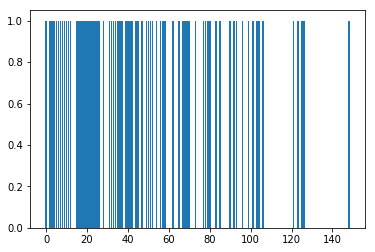

In [30]:
plt.bar(proba['Cabin'], proba['Survived']);

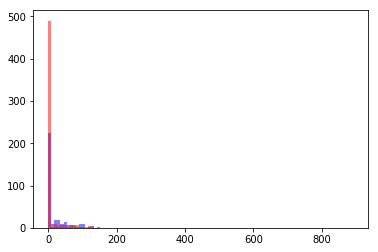

In [31]:
alive = proba.Cabin[proba.Survived == 1]
dead = proba.Cabin[proba.Survived == 0]
_, bins = np.histogram(proba, bins=100)
plt.hist(alive, bins=bins, color='blue', alpha=.5);
plt.hist(dead, bins=bins, color='red', alpha=.5);

In [32]:
X = proba.drop('Survived', axis=1)
y = proba['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [33]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.982035928144
test score:  0.825112107623


In [34]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]},
                     return_train_score=True)
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
16,1,0.831650,"{'max_depth': 8, 'n_estimators': 30}"
13,2,0.829405,"{'max_depth': 6, 'n_estimators': 70}"
12,2,0.829405,"{'max_depth': 6, 'n_estimators': 50}"
15,4,0.828283,"{'max_depth': 8, 'n_estimators': 10}"
6,4,0.828283,"{'max_depth': 4, 'n_estimators': 30}"
8,4,0.828283,"{'max_depth': 4, 'n_estimators': 70}"
9,7,0.827160,"{'max_depth': 4, 'n_estimators': 100}"
11,7,0.827160,"{'max_depth': 6, 'n_estimators': 30}"
21,9,0.826038,"{'max_depth': 10, 'n_estimators': 30}"
7,9,0.826038,"{'max_depth': 4, 'n_estimators': 50}"


--------------------------------

--------------------------------

--------------------------------

--------------------------------

Може ли да се измъкне нещо от 'Fare'?

In [35]:
sroba = data.copy()
sroba['Fare'] = original['Fare'].fillna(original.Fare.mean())
sroba

,PassengerId,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Fare
0,1,0,3,22.000000,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.2500
1,2,1,1,38.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,71.2833
2,3,1,3,26.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.9250
3,4,1,1,35.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,53.1000
4,5,0,3,35.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13.0000
887,888,1,1,19.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0000
888,889,0,3,29.699118,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,23.4500
889,890,1,1,26.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0000


In [36]:
X = sroba.drop('Survived', axis=1)
y = sroba['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [37]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.986526946108
test score:  0.80269058296


In [38]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]},
                      cv=5,
                      return_train_score=True)
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(5)

,rank_test_score,mean_test_score,params
17,1,0.823793,"{'max_depth': 8, 'n_estimators': 50}"
13,1,0.823793,"{'max_depth': 6, 'n_estimators': 70}"
18,1,0.823793,"{'max_depth': 8, 'n_estimators': 70}"
16,4,0.822671,"{'max_depth': 8, 'n_estimators': 30}"
14,4,0.822671,"{'max_depth': 6, 'n_estimators': 100}"


In [39]:
skf = StratifiedKFold(n_splits=5, random_state=0)
scores = []
for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    model = RandomForestClassifier(random_state=0, n_estimators=120, max_depth=4).fit(X_train, y_train)
    print('split', len(scores)+1, ':')
    print("  train score:", model.score(X_train, y_train))
    scores.append(model.score(X_test, y_test))
    print("  test score: ", scores[-1])
    
print()
print('Mean test score:', np.mean(scores))

split 1 :
  train score: 0.845505617978
  test score:  0.798882681564
split 2 :
  train score: 0.841292134831
  test score:  0.826815642458
split 3 :
  train score: 0.840112201964
  test score:  0.825842696629
split 4 :
  train score: 0.84572230014
  test score:  0.780898876404
split 5 :
  train score: 0.829131652661
  test score:  0.83615819209

Mean test score: 0.813719617829


~~Има подобрение - <span style="color:blue">0.832772</span> а предишния *успешен* модел <span style="color:blue">0.831650</span>.~~

 Aми aко миксираме с 'Cabin'?

In [40]:
mproba = proba.copy()
mproba['Fare'] = original['Fare'].fillna(original.Fare.mean())
mproba

,PassengerId,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Cabin,Fare
0,1,0,3,22.000000,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,7.2500
1,2,1,1,38.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,85,71.2833
2,3,1,3,26.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,7.9250
3,4,1,1,35.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,123,53.1000
4,5,0,3,35.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,13.0000
887,888,1,1,19.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,42,30.0000
888,889,0,3,29.699118,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,23.4500
889,890,1,1,26.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,148,30.0000


In [41]:
X = mproba.drop('Survived', axis=1)
y = mproba['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [42]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.98502994012
test score:  0.834080717489


In [43]:
search = GridSearchCV(model, {'n_estimators': [20, 30, 50, 70, 100, 120],
                              'max_depth': [5, 6, 8, 10, 12, 15]},
                      cv=5,
                      return_train_score=True)
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(5)

,rank_test_score,mean_test_score,params
19,1,0.829405,"{'max_depth': 10, 'n_estimators': 30}"
12,1,0.829405,"{'max_depth': 8, 'n_estimators': 20}"
11,3,0.828283,"{'max_depth': 6, 'n_estimators': 120}"
13,3,0.828283,"{'max_depth': 8, 'n_estimators': 30}"
18,3,0.828283,"{'max_depth': 10, 'n_estimators': 20}"


In [44]:
skf = StratifiedKFold(n_splits=5, random_state=0)
scores = []
for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    model = RandomForestClassifier(random_state=0, n_estimators=120, max_depth=4).fit(X_train, y_train)
    print('split', len(scores)+1, ':')
    print("  train score:", model.score(X_train, y_train))
    scores.append(model.score(X_test, y_test))
    print("  test score: ", scores[-1])

print()
print('Mean test score:', np.mean(scores))

split 1 :
  train score: 0.842696629213
  test score:  0.837988826816
split 2 :
  train score: 0.841292134831
  test score:  0.821229050279
split 3 :
  train score: 0.841514726508
  test score:  0.825842696629
split 4 :
  train score: 0.844319775596
  test score:  0.803370786517
split 5 :
  train score: 0.829131652661
  test score:  0.853107344633

Mean test score: 0.828307740975


--------------------------------------------

--------------------------------------------

--------------------------------------------

--------------------------------------------

--------------------------------------------

## Други модели

само да си припомня кои данни къде са:
* data - almost all data, one-hot encoded 
* less_data - reduced number of features - current best score with RandomForest
* proba - based on data but adds "Cabin" feature
* sproba - based on data but adds "Fare" feature
* mproba - based on data, plus both "Cabin" and "Fare" features

Всички следващи модели са пробвани с данни включващи максимален брой характеристики и дават по-слаби резултати от RandomForest с данни с орязани характеристики. Този път ще се ползва орязания DataFrame.

In [61]:
X = less_data.drop('Survived', axis=1)
y = less_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6, leaf_size=30).fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.838323353293
test score:  0.798206278027


In [63]:
KNeighborsClassifier.get_params(model).keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [64]:
search = GridSearchCV(model, {'n_neighbors': [3, 5, 7, 10, 12],
#                               'leaf_size ': [10, 20, 30, 42, 50],
                              'weights': ['uniform', 'distance'],},
                      cv=5,
                      return_train_score=True)
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(5)

,rank_test_score,mean_test_score,params
0,1,0.791246,"{'n_neighbors': 3, 'weights': 'uniform'}"
9,2,0.783389,"{'n_neighbors': 12, 'weights': 'distance'}"
1,3,0.781145,"{'n_neighbors': 3, 'weights': 'distance'}"
2,3,0.781145,"{'n_neighbors': 5, 'weights': 'uniform'}"
7,3,0.781145,"{'n_neighbors': 10, 'weights': 'distance'}"


GradientBoostingClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.854790419162
test score:  0.816143497758


In [66]:
search = GridSearchCV(model, {'n_estimators': [2, 5, 8, 10, 30, 50],
                              'max_depth': [2, 4, 6, 8],
                              'learning_rate': [.01, .1, 1.0],
#                               'leaf_size ': [10, 20, 30, 42, 50],
#                               'weights': ['uniform', 'distance'],
                             },
                      cv=5,
                      return_train_score=True)
search.fit(X, y)

results = pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

In [67]:
# pd.options.display.display.max_columns = 100
pd.options.display.max_colwidth = 80
results.head(5)

,rank_test_score,mean_test_score,params
49,1,0.829405,"{'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 5}"
52,1,0.829405,"{'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 30}"
28,3,0.826038,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 30}"
29,4,0.824916,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}"
51,5,0.823793,"{'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 10}"


Support Vector Machine

In [68]:
from sklearn import svm



model = svm.SVC(random_state=42).fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.866766467066
test score:  0.807174887892


In [69]:
search = GridSearchCV(model, {'C': [0.001, 0.01, 0.1, 1.0, 10],
                              'decision_function_shape': ['ovr', 'ovo'],
                              'degree': [0.1, 1, 3, 5, 10],
#                               'gamma': ['auto'],
#                               'kernel': ['rbf', 'poly'],
                              'tol': [0.1, 0.001, 0.0001],
                             },
                      cv=5,
                      return_train_score=True)
search.fit(X, y)

results = pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

In [70]:
results.head(5)

,rank_test_score,mean_test_score,params
110,1,0.81257,"{'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 1, 'tol': 0.0001}"
117,1,0.81257,"{'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 10, 'tol': 0.1}"
116,1,0.81257,"{'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 5, 'tol': 0.0001}"
115,1,0.81257,"{'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 5, 'tol': 0.001}"
114,1,0.81257,"{'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 5, 'tol': 0.1}"


Neural Nets... Shouldn't it be Perceptron Nets?

In [71]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                           hidden_layer_sizes=(18, 10),
                          random_state=42).fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.798206278027


In [72]:
search = GridSearchCV(model, {'hidden_layer_sizes': [(185,), (190,), (195,), (200,), (205,), (210,)],
                              'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1],
#                               'tol': [0.01, 0.001, 0.0001, 0.00001],
                             },
                      return_train_score=True)
search.fit(X, y)
results = pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

In [73]:
results.head(5)

,rank_test_score,mean_test_score,params
17,1,0.823793,"{'alpha': 0.001, 'hidden_layer_sizes': (210,)}"
6,1,0.823793,"{'alpha': 0.0001, 'hidden_layer_sizes': (185,)}"
26,3,0.821549,"{'alpha': 0.03, 'hidden_layer_sizes': (195,)}"
34,4,0.820426,"{'alpha': 0.1, 'hidden_layer_sizes': (205,)}"
23,5,0.819304,"{'alpha': 0.01, 'hidden_layer_sizes': (210,)}"


Все пак с повечко характеристики:

In [74]:
data

,PassengerId,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
0,1,0,3,22.000000,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,38.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,26.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35.000000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,35.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1,1,19.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,29.699118,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,890,1,1,26.000000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                           hidden_layer_sizes=(18, 10),
                          random_state=42).fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.782934131737
test score:  0.766816143498


In [79]:
search = GridSearchCV(model, {'hidden_layer_sizes': [(185,), (190,), (195,), (200,), (205,), (210,)],
                              'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1],
#                               'tol': [0.01, 0.001, 0.0001, 0.00001],
                             },
                      return_train_score=True)
search.fit(X, y)
results = pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

In [80]:
results.head(5)

,rank_test_score,mean_test_score,params
30,1,0.790123,"{'alpha': 0.1, 'hidden_layer_sizes': (185,)}"
1,2,0.789001,"{'alpha': 1e-05, 'hidden_layer_sizes': (190,)}"
0,3,0.787879,"{'alpha': 1e-05, 'hidden_layer_sizes': (185,)}"
19,4,0.785634,"{'alpha': 0.01, 'hidden_layer_sizes': (190,)}"
27,5,0.784512,"{'alpha': 0.03, 'hidden_layer_sizes': (200,)}"


Изглежда при повече характеристики се справя по-зле. Но може да е и от solver-a. Едва ли - връщам less_data

In [81]:
X = less_data.drop('Survived', axis=1)
y = less_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = MLPClassifier(alpha=1e-5, random_state=42).fit(X_train, y_train)

In [82]:
search = GridSearchCV(model, {'solver': ['lbfgs', 'sgd', 'adam'],
                              'hidden_layer_sizes': [(185,), (190,), (195,), (200,), (205,), (210,)],
                              'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1],
                             },
                      return_train_score=True)
search.fit(X, y)
results = pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

In [83]:
results.head(5)

,rank_test_score,mean_test_score,params
18,1,0.823793,"{'alpha': 0.0001, 'hidden_layer_sizes': (185,), 'solver': 'lbfgs'}"
51,1,0.823793,"{'alpha': 0.001, 'hidden_layer_sizes': (210,), 'solver': 'lbfgs'}"
78,3,0.821549,"{'alpha': 0.03, 'hidden_layer_sizes': (195,), 'solver': 'lbfgs'}"
102,4,0.820426,"{'alpha': 0.1, 'hidden_layer_sizes': (205,), 'solver': 'lbfgs'}"
69,5,0.819304,"{'alpha': 0.01, 'hidden_layer_sizes': (210,), 'solver': 'lbfgs'}"


Последно - има ли смисъл от повече скрити слоеве (hidden layers)? Май ще се чака дълго.

In [84]:
search = GridSearchCV(model, {'solver': ['lbfgs', 'sgd', 'adam'],
                              'hidden_layer_sizes': [(185,), (210,), (185, 100), (185, 200), (200, 185), (200, 100),],
                              'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1],
                             },
                      return_train_score=True)
search.fit(X, y)
results = pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

In [85]:
results.head(5)

,rank_test_score,mean_test_score,params
18,1,0.823793,"{'alpha': 0.0001, 'hidden_layer_sizes': (185,), 'solver': 'lbfgs'}"
39,1,0.823793,"{'alpha': 0.001, 'hidden_layer_sizes': (210,), 'solver': 'lbfgs'}"
57,3,0.819304,"{'alpha': 0.01, 'hidden_layer_sizes': (210,), 'solver': 'lbfgs'}"
102,3,0.819304,"{'alpha': 0.1, 'hidden_layer_sizes': (200, 185), 'solver': 'lbfgs'}"
12,3,0.819304,"{'alpha': 1e-05, 'hidden_layer_sizes': (200, 185), 'solver': 'lbfgs'}"


Най добри резултати има при RandomForestClassifier с параметри n_estimators=100, max_depth=5 и данни с характеристики: 'Pclass', 'Age', 'FamilySize', 'Male', 'Embarked', 'Title'; Резултат <span style="color:blue">0.83165</span>